In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
%matplotlib inline

In [3]:
data = pd.read_csv('../dataset/SeoulBikeData.csv', encoding='Windows-1252')

In [5]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
# Create a copy of data
df = data.copy()

In [11]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [13]:
# Are there duplicates
len(df[df.duplicated()])

0

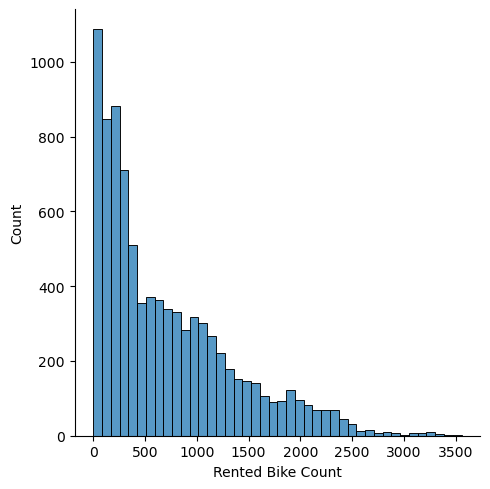

In [15]:
# Checking distribution of bike rentals

sns.displot(df['Rented Bike Count'])

In [17]:
# Creating additional features such as Week day and Month as bike rental may also depend on these spatial features

df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y") 
df['month'] = df['Date'].dt.month_name()
df['Weekday'] = df['Date'].dt.day_name()
df.columns
df.dtypes

# Order months in the right order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)
#df.sort_values(by='Date',inplace=True)

# Order week days in the right order
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=cats, ordered=True)
#df.sort_values(by='Date',inplace=True)

In [19]:
df.head().T

,0,1,2,3,4
Date,2017-12-01 00:00:00,2017-12-01 00:00:00,2017-12-01 00:00:00,2017-12-01 00:00:00,2017-12-01 00:00:00
Rented Bike Count,254,204,173,107,78
Hour,0,1,2,3,4
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0
Humidity(%),37,38,39,40,36
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3
Visibility (10m),2000,2000,2000,2000,2000
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0


C:\Users\Marcin Krawczyk\AppData\Local\Temp\ipykernel_28308\903271798.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_pivot = df.groupby(['month','Weekday'])['Rented Bike Count'].sum().reset_index()
C:\Users\Marcin Krawczyk\AppData\Local\Temp\ipykernel_28308\903271798.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  month_pivot=df_pivot.pivot_table(values='Rented Bike Count',index='Weekday',columns='month')


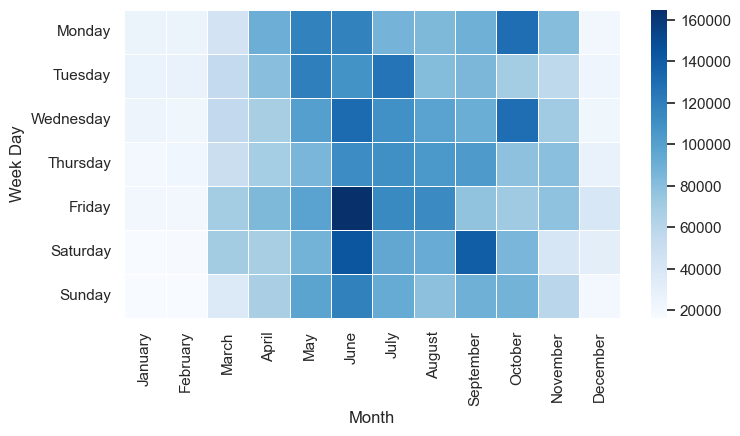

In [21]:
# Hitmap of bike rentals by Month and weekday
# ============================================================================================
df_pivot = df.groupby(['month','Weekday'])['Rented Bike Count'].sum().reset_index()
df_pivot

month_pivot=df_pivot.pivot_table(values='Rented Bike Count',index='Weekday',columns='month')

sns.set_theme(rc={'figure.figsize':(8,4)})

sns.heatmap(month_pivot, 
            cmap='Blues',
            linecolor='white',
            linewidth=0.5)

plt.ylabel("Week Day")
plt.xlabel("Month")

plt.show()

<Axes: >

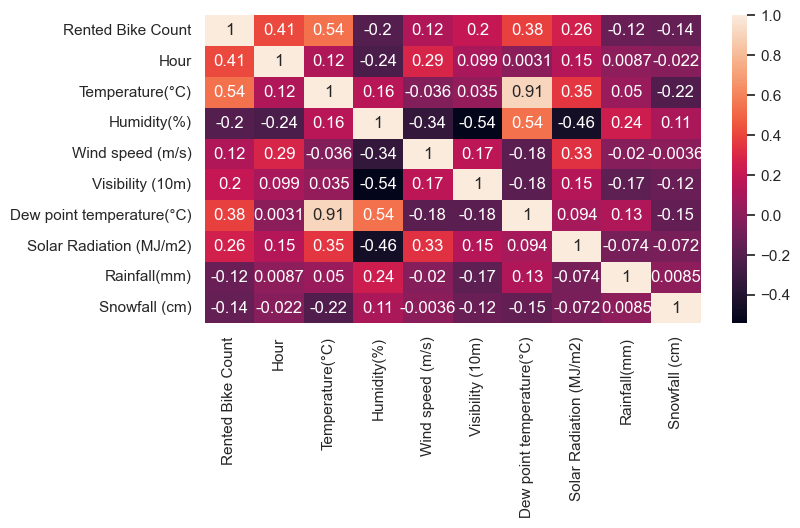

In [23]:
# Selecting only numeric columns - drops of Seasons, Holiday Function Day Weekda and Month

df_numeric = df.select_dtypes(include=np.number)
sns.heatmap(df_numeric.corr(), annot=True)

C:\Users\Marcin Krawczyk\AppData\Local\Temp\ipykernel_28308\298485038.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('month')['Rented Bike Count'].sum().plot(kind='bar')


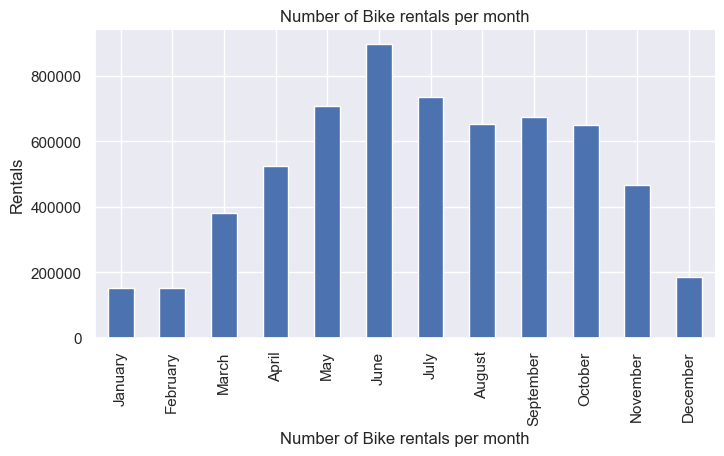

In [25]:
# Bike renatls by Month
#===================================

df.groupby('month')['Rented Bike Count'].sum().plot(kind='bar') 
#sns.barplot(x="month", y="Rented Bike Count", data=df)
plt.title("Number of Bike rentals per month")
plt.ylabel("Rentals")
plt.xlabel("Number of Bike rentals per month")

sns.despine(left=False, bottom=False)
plt.show()


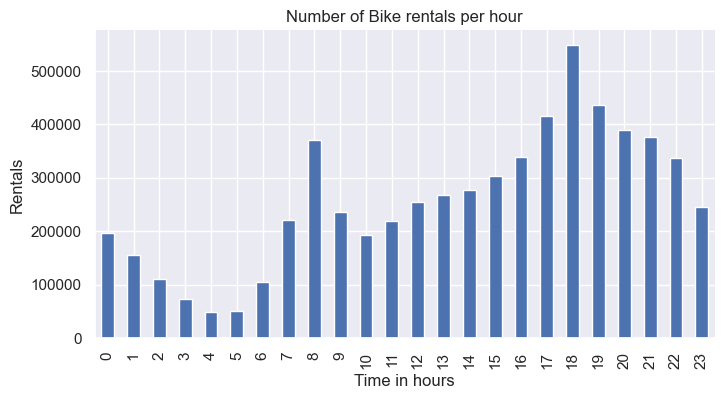

In [27]:
# Bike renatls by Time of day (hr)
#===================================
df.groupby('Hour')['Rented Bike Count'].sum().plot(kind='bar') 
plt.title("Number of Bike rentals per hour")
plt.ylabel("Rentals")
plt.xlabel("Time in hours")

sns.despine(left=False, bottom=False)
plt.show()

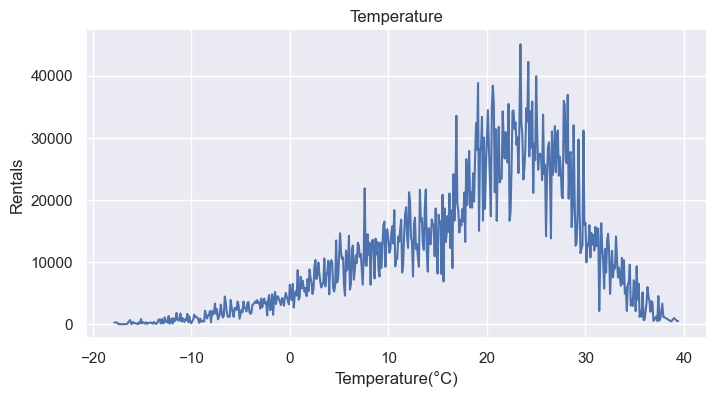

In [29]:
# Bike renatls by Temperature 
#===================================

df.groupby('Temperature(°C)')['Rented Bike Count'].sum().plot() 
plt.title("Temperature")
plt.ylabel("Rentals")
plt.xlabel("Temperature(°C)")

sns.despine(left=False, bottom=False)
plt.show()

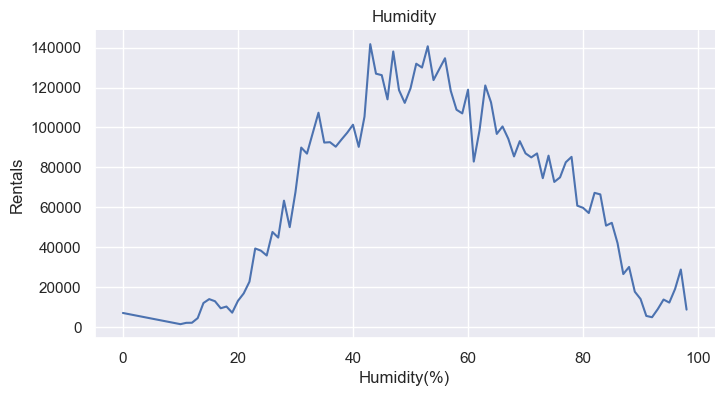

In [31]:
# Bike renatls by Humidity
#===================================

df.groupby('Humidity(%)')['Rented Bike Count'].sum().plot() 
plt.title("Humidity")
plt.ylabel("Rentals")
plt.xlabel("Humidity(%)")

sns.despine(left=False, bottom=False)
plt.show()

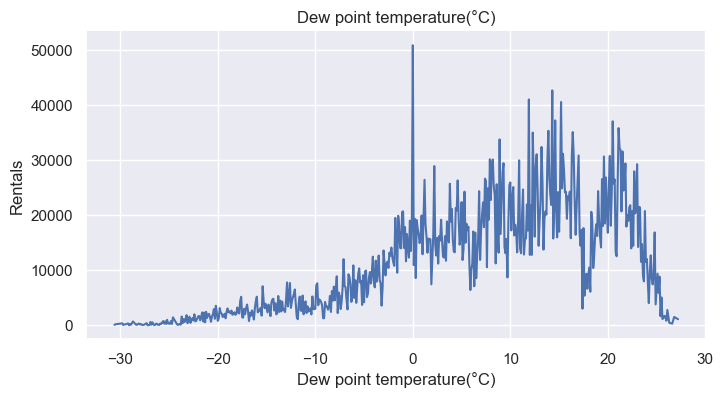

In [33]:
# Bike renatls by Dew point temperature
#===================================

df.groupby('Dew point temperature(°C)')['Rented Bike Count'].sum().plot() 
plt.title("Dew point temperature(°C)")
plt.ylabel("Rentals")
plt.xlabel("Dew point temperature(°C)")

sns.despine(left=False, bottom=False)
plt.show()

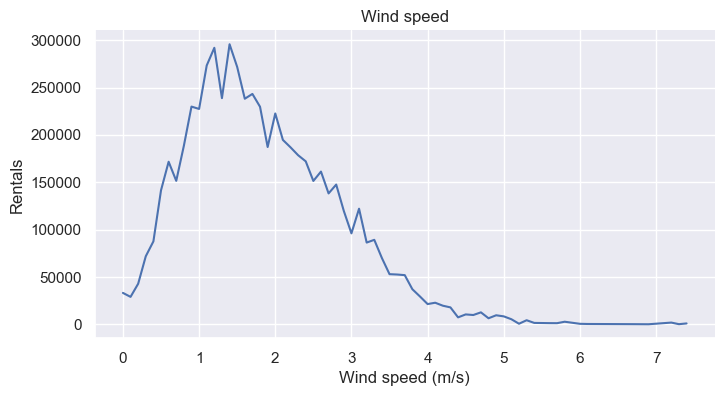

In [35]:
# Bike rentals by Wind speed
#===================================

df.groupby('Wind speed (m/s)')['Rented Bike Count'].sum().plot() 
plt.title("Wind speed")
plt.ylabel("Rentals")
plt.xlabel("Wind speed (m/s)")

sns.despine(left=False, bottom=False)
plt.show()

In [37]:
# What are bike rentals by different Spatial features? 

df.groupby('Holiday')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()


,Holiday,Rented Bike Count
0,No Holiday,5956419
1,Holiday,215895


In [45]:
result = df.groupby('Holiday')['Rented Bike Count'].agg(
    TotalRentedBikes='sum',
    Count='size'
).sort_values(by='TotalRentedBikes', ascending=False).reset_index()
result['AverageRentedBikes'] = result['TotalRentedBikes'] / result['Count']
print(result)

      Holiday  TotalRentedBikes  Count  AverageRentedBikes
0  No Holiday           5956419   8328          715.228026
1     Holiday            215895    432          499.756944


In [39]:
Season_analysis = df.groupby('Seasons')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()

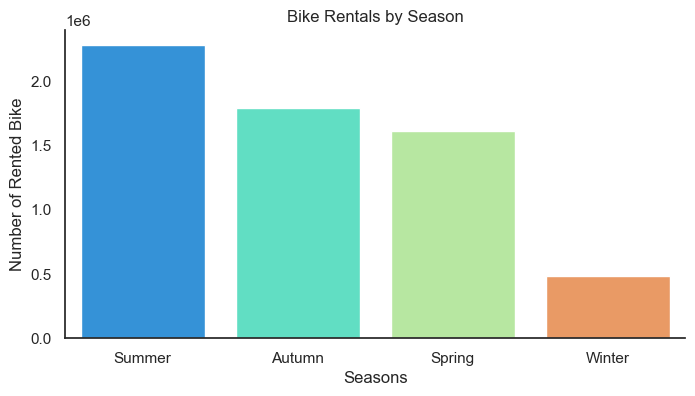

In [41]:
# Set the theme to white
sns.set_theme(style="white")
sns.set_theme(rc={'figure.figsize':(8,4)})


sns.set_theme(rc={'figure.figsize':(8,4)},palette='Blues_d')
sns.set_style(style='white')

sns.barplot(x='Seasons', y='Rented Bike Count', data=Season_analysis, 
             palette='rainbow',
            hue ="Seasons")

plt.title("Bike Rentals by Season")
plt.ylabel("Number of Rented Bike")
plt.xlabel("Seasons")

# Remove Top and Right borders
sns.despine(left=False, bottom=False)

plt.show()